In [1]:
import tensorflow as tf
import numpy as np
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '/Users/andrew/Documents/Lab/aas/Hera/modules'))
from NN_helpers import *
from aas_neural_networks import *
from NN_results_helpers import *
%config InlineBackend.figure_format = 'retina'

# Load, Separate, & PreProcess Data

In [2]:
data_path = '../../data/test-34-500/200-point-sources_34-baselines_first-500-lsts.npz'
testing_data_percentage = 0.20

X_train, X_test, y_train, y_test, input_scaler, output_scaler = pre_process_data(data_path, testing_data_percentage)

# Create Network

In [3]:
number_of_inputs  = X_train.shape[1]
number_of_outputs = X_test.shape[1]
layer_nodes = [256,128,64]
learning_rate = 0.0001

test_network = Sheridan_NN_One(layer_nodes,number_of_inputs, number_of_outputs, learning_rate)

# Train Network

In [4]:
num_epochs = 5
num_batches = 2
log_direc = 'logs/test-discard'

sheridan_train(X_train, y_train,
               X_test, y_test,
               num_epochs, num_batches,
               test_network, output_scaler, log_direc, keep_prob_rate = 0.50, model_save_interval = 5)

epoch:    4 -- testing_cost: 0.2536997795 -- batch:

In [5]:
training_costs, testing_costs = get_costs('logs/',num_epochs)

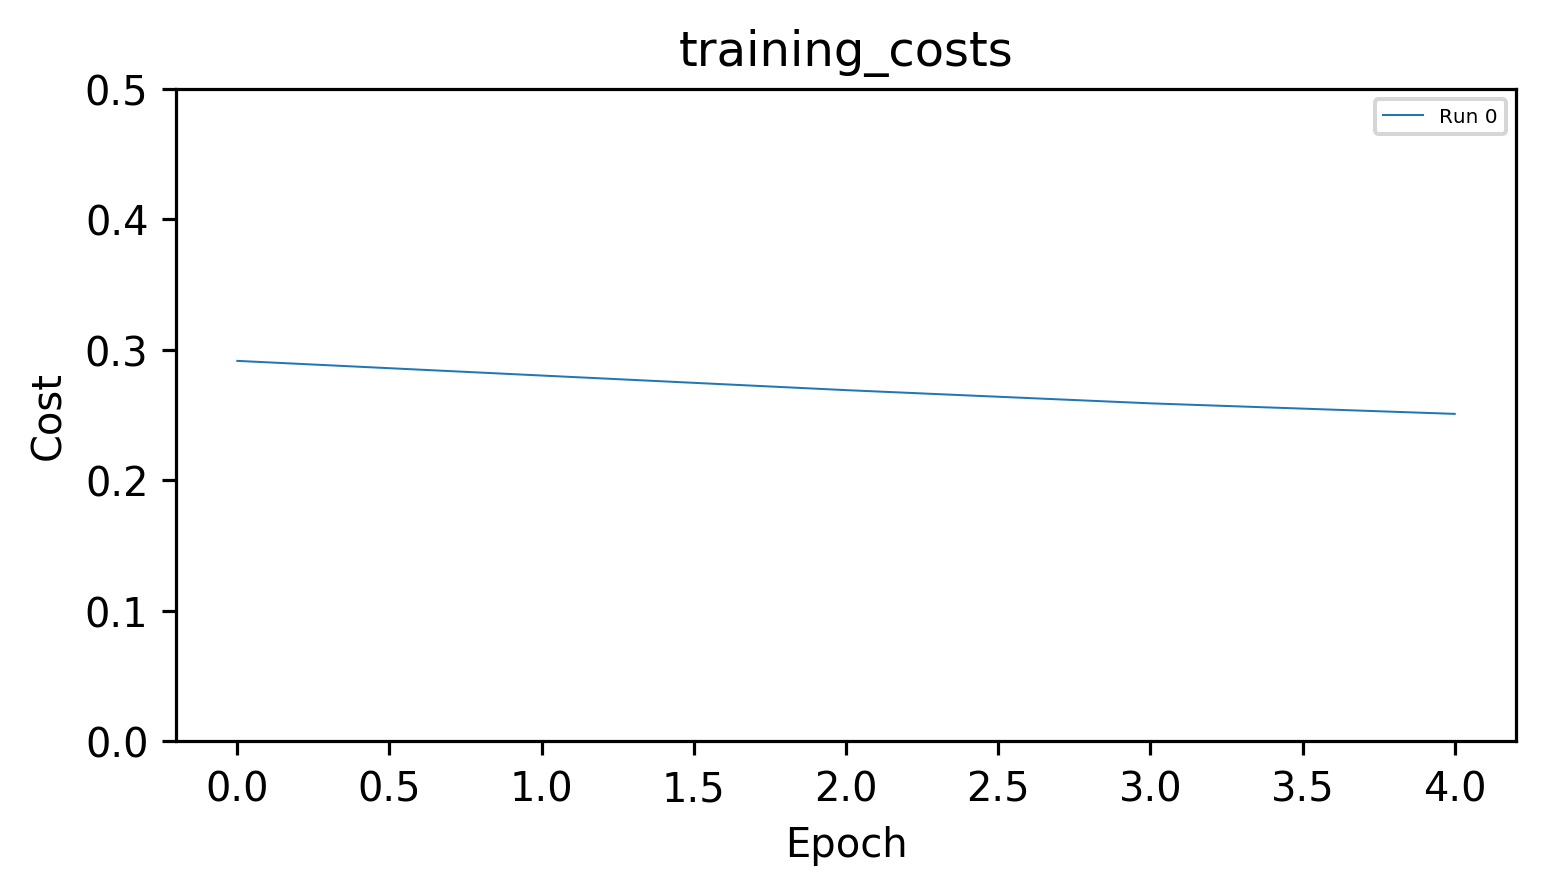

In [10]:
plot_costs(training_costs, 'training_costs', ylim = [0,0.5], highlight_run = 0)

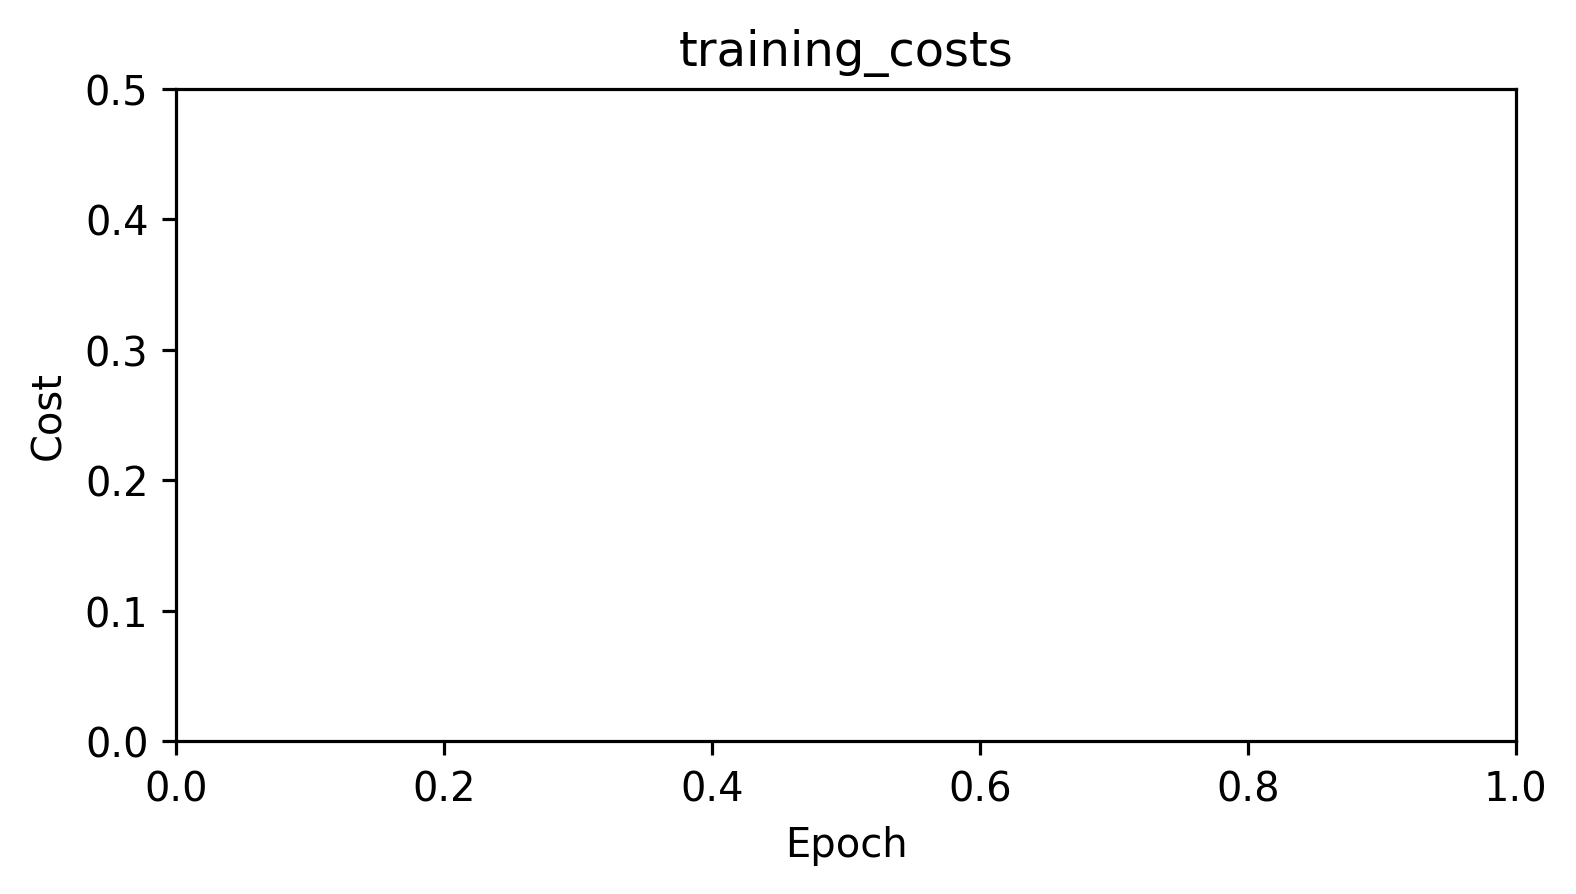

In [11]:
plot_costs(testing_costs, 'training_costs', ylim = [0,0.5], highlight_run = 0)

> The testing costs aren't zero, `get_costs()` is just incorrectly retrieving them for some reason.
 - `get_costs()` assumes that there are the same number of costs as epochs, and returns all zeros when this is not the case.
 - TensorBoard shows that while there are 5 recorded training costs, there are only 4 recorded testing costs.
  - this implies the error is actually is `sheridan_train()`